In [159]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.axes._axes as axes
sns.set()

In [161]:
train_dataset = datasets.MNIST(
    root="./",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

In [162]:
test_dataset = datasets.MNIST(
    root="./",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [163]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [164]:
# Build the model
model = nn.Sequential(
    nn.Linear(in_features=784, out_features=128),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=10)
)

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [165]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss() # combines the softmax by itself
optimizer = optim.Adam(model.parameters())


In [166]:
# data loader/generators
batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [167]:
# Train the model

epochs = 20

epoch_train_losses = np.zeros(epochs)
epoch_train_acc = np.zeros(epochs)

epoch_test_losses = np.zeros(epochs)
epoch_test_acc = np.zeros(epochs)

for epoch in range(epochs):
    batch_train_losses = []
    batch_train_acc = []

    for inputs, targets in train_loader:
        # move data to device
        inputs, targets = inputs.to(device), targets.to(device)

        # reshape the input from 28x28 to 784
        inputs = inputs.view(-1, 784)

        # zero the parameter gradient
        optimizer.zero_grad()

        # forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # get accuracy
        max_val_batch_array, indices = torch.max(outputs, dim=1)
        current_batch_corrects = (indices == targets).sum().item()



        # backprop
        loss.backward()
        optimizer.step()

        # save the batch loss and accuracy
        batch_train_losses.append(loss.item())
        batch_train_acc.append(current_batch_corrects / batch_size)

    # calculate the epoch loss and accuracy
    current_epoch_train_loss = np.mean(batch_train_losses)
    current_epoch_train_acc = np.mean(batch_train_acc)

# ================ Training Done ======================

    batch_test_losses = []
    batch_test_acc = []

    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 784)

        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # get accuracy
        max_val_batch_array, indices = torch.max(outputs, dim=1)
        current_batch_corrects = (indices == targets).sum().item()

        # save the batch loss and accuracy
        batch_test_losses.append(loss.item())
        batch_test_acc.append(current_batch_corrects / batch_size)


        batch_test_losses.append(loss.item())

    # calculate the epoch loss and accuracy
    current_epoch_test_loss = np.mean(batch_test_losses)
    current_epoch_test_acc = np.mean(batch_test_acc)

# =============== Testing Done =========================

    # save the losses
    epoch_train_losses[epoch] = current_epoch_train_loss
    epoch_test_losses[epoch] = current_epoch_test_loss
    epoch_train_acc[epoch] = current_epoch_train_acc
    epoch_test_acc[epoch] = current_epoch_test_acc

    print(f"Epoch:{epoch+1}, TrainLoss::{epoch_train_losses[epoch]:0.3f}, "
          f"TestLoss::{epoch_test_losses[epoch]:0.3f}")
    print(f"Epoch:{epoch+1}, TrainAcc::{epoch_train_acc[epoch]:0.3f}, "
          f"TestAcc::{epoch_test_acc[epoch]:0.3f}")
    print("=" * 50)

Epoch:1, TrainLoss::0.410, TestLoss::0.224
Epoch:1, TrainAcc::0.893, TestAcc::0.926
Epoch:2, TrainLoss::0.191, TestLoss::0.159
Epoch:2, TrainAcc::0.945, TestAcc::0.942
Epoch:3, TrainLoss::0.140, TestLoss::0.128
Epoch:3, TrainAcc::0.959, TestAcc::0.950
Epoch:4, TrainLoss::0.109, TestLoss::0.114
Epoch:4, TrainAcc::0.968, TestAcc::0.954
Epoch:5, TrainLoss::0.090, TestLoss::0.093
Epoch:5, TrainAcc::0.974, TestAcc::0.961
Epoch:6, TrainLoss::0.073, TestLoss::0.093
Epoch:6, TrainAcc::0.978, TestAcc::0.961
Epoch:7, TrainLoss::0.062, TestLoss::0.079
Epoch:7, TrainAcc::0.982, TestAcc::0.965
Epoch:8, TrainLoss::0.052, TestLoss::0.077
Epoch:8, TrainAcc::0.984, TestAcc::0.965
Epoch:9, TrainLoss::0.046, TestLoss::0.071
Epoch:9, TrainAcc::0.986, TestAcc::0.968
Epoch:10, TrainLoss::0.038, TestLoss::0.077
Epoch:10, TrainAcc::0.989, TestAcc::0.966
Epoch:11, TrainLoss::0.033, TestLoss::0.070
Epoch:11, TrainAcc::0.991, TestAcc::0.967
Epoch:12, TrainLoss::0.028, TestLoss::0.067
Epoch:12, TrainAcc::0.992, T

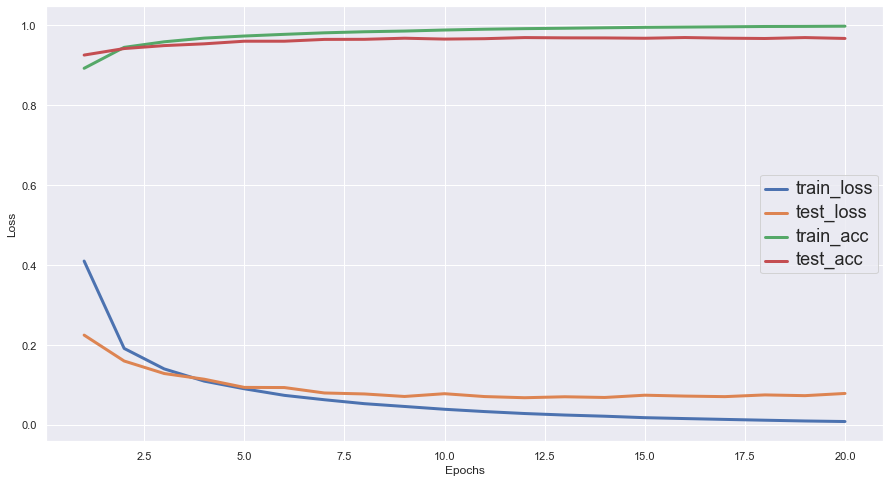

In [169]:
# plot the performance
import pandas as pd
epochx = range(1, epochs+1)
plot_df = pd.DataFrame(data=np.c_[epochx,
                                  epoch_train_losses,
                                  epoch_test_losses,
                                  epoch_train_acc,
                                  epoch_test_acc],
                       columns=['epochs',
                                'train_loss',
                                'test_loss',
                                'train_acc',
                                'test_acc'])

# do the actual plots
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='train_loss', ax=ax,
             label='train_loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='test_loss', ax=ax, label='test_loss',
             linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='train_acc', ax=ax,
             label='train_acc', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='test_acc', ax=ax, label='test_acc',
             linewidth=3)

ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18');
# for legend text